<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Primer-ejemplo" data-toc-modified-id="Primer-ejemplo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Primer ejemplo</a></span></li><li><span><a href="#Consrucción-manual-del-modelo" data-toc-modified-id="Consrucción-manual-del-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Consrucción manual del modelo</a></span></li><li><span><a href="#Regresión-Logit" data-toc-modified-id="Regresión-Logit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regresión Logit</a></span></li><li><span><a href="#Otro-ejemplo" data-toc-modified-id="Otro-ejemplo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otro ejemplo</a></span></li><li><span><a href="#Análisis-discriminante-lineal." data-toc-modified-id="Análisis-discriminante-lineal.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Análisis discriminante lineal.</a></span></li><li><span><a href="#Construcción-manual-del-modelo" data-toc-modified-id="Construcción-manual-del-modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Construcción manual del modelo</a></span></li><li><span><a href="#LDA-con-scikit-Learn" data-toc-modified-id="LDA-con-scikit-Learn-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LDA con scikit-Learn</a></span></li><li><span><a href="#Lineal-y-cuadrática-Análisis-discriminante" data-toc-modified-id="Lineal-y-cuadrática-Análisis-discriminante-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Lineal y cuadrática Análisis discriminante</a></span></li></ul></div>

# Introducción

Con esta técnica lo que se consigue es reducir la dimensión del conjunto de features o variables, mediante la obtención de una serie de ejes llamados factoriales, que son ortogonales y además preservan la mayor parte de la variabilidad de las variables originales. Este método en su conjunto **es una transformación lineal no supervisada**.

La idea general es la siguiente. Si tenemos una matriz de datos X (n,d), con este método lo que se busca es una W (d,k) de tal manera, que se obtenga un vector Z (n,k) con k<d y preservando la mayor cantidad de información el sistema. Las componentes principales, serían los valores de la matriz W, y están construidas con la condición de que la primera componente  principal contenga la mayor parte de la variabilidad total, la segunda componente la que le siga en esa variabilidad, y así sucesivamente. Ademas estas componentes son independientes.

Hay que tener además en cuenta que estos modelos PCA son muy dependientes de la variabilidad y escala de las features, y por lo tanto es bueno proceder a la estandarización de las features, antes de proceder a hacer el análisis de componentes principales.

Por regla general los pasos que sigue un análisis de componentes principales, son los siguientes:

1.- Estandarizar el conjunto de datos.

2.-Construir la matriz de varianzas y covarianzas.

3.- Descomponer la matriz de varianzas y covarianzas en sus valores y vectores propios.

4.- Seleccionar k valores propios que se corresponden con los k mayores valores propios encontrados.

5.- Construir una matriz de proyección W con los k valores propios obtenidos anteriormente.

6.- Obtener los nuevos valores mediante la expresión xW, es decir proyectando los vectores originales sobre los nuevos ejes.

A continuación se muestra un sencillo ejemplo, utilizando la clase PCA que scikit learn implementa para ello.

# Primer ejemplo

Tomaremos una pequeña cantidad de datos con el fin de exponer de forma clara este método

In [1]:
import pandas as pd
# Creamos los datos
datos=pd.DataFrame({
    'Alumno':(1,2,3,4,5,6,7,8,9,10,11),
    'Mats':(1,5,6,3,2,6,6,3,8,2,9),
    'Frances':(4,5,10,6,4,8,6,5,5,5,7),
    'Ingles':(5,4,9,6,6,7,6,8,5,8,7),
    'Fisica':(3,4,6,4,1,8,7,4,8,4,9)
})
print(datos.head())
print("\n Resumen estadístico: \n")
print(datos.describe())
# Nos quedamos sólo con las variables de interés estadístico
datos2=datos.iloc[:,1:]


   Alumno  Mats  Frances  Ingles  Fisica
0       1     1        4       5       3
1       2     5        5       4       4
2       3     6       10       9       6
3       4     3        6       6       4
4       5     2        4       6       1

 Resumen estadístico: 

          Alumno       Mats    Frances     Ingles     Fisica
count  11.000000  11.000000  11.000000  11.000000  11.000000
mean    6.000000   4.636364   5.909091   6.454545   5.272727
std     3.316625   2.618119   1.814086   1.507557   2.493628
min     1.000000   1.000000   4.000000   4.000000   1.000000
25%     3.500000   2.500000   5.000000   5.500000   4.000000
50%     6.000000   5.000000   5.000000   6.000000   4.000000
75%     8.500000   6.000000   6.500000   7.500000   7.500000
max    11.000000   9.000000  10.000000   9.000000   9.000000


In [2]:
#Calculamos la matriz de varianzas covarianzas
print("Matriz de varianzas covarianzas \n",datos2.cov())
print("\n Matriz de correlaciones \n:", datos2.corr())

Matriz de varianzas covarianzas 
              Mats   Frances    Ingles    Fisica
Mats     6.854545  2.563636  0.081818  5.909091
Frances  2.563636  3.290909  1.645455  2.627273
Ingles   0.081818  1.645455  2.272727  0.563636
Fisica   5.909091  2.627273  0.563636  6.218182

 Matriz de correlaciones 
:              Mats   Frances    Ingles    Fisica
Mats     1.000000  0.539771  0.020729  0.905106
Frances  0.539771  1.000000  0.601664  0.580785
Ingles   0.020729  0.601664  1.000000  0.149932
Fisica   0.905106  0.580785  0.149932  1.000000


In [3]:
# Ahora implementamos realmente el modelo
import numpy as np
from sklearn.decomposition import PCA
# Obtenemos la clase y la implementamos
pca=PCA(n_components=4)
# Con n_components=4 indicamos que nos quedamos con los 4 mayores valores propios
pca.fit(datos2)

print("Valores propios o singulares: \n", pca.singular_values_ )
print("\n Varianza explicada: \n",pca.explained_variance_)
print("\n Porcentaje de la varianza explicada: \n",pca.explained_variance_ratio_)
# Coordenadas de los individuos en los nuevos ejes
a=pca.transform(datos2)
print("\n Datos proyectados en los nuevos ejes: \n",a )
b=pca.components_
print("Varianzas y covarianzas datos transformados: \n",np.cov(b))
print("\n Correlaciones entre los factores: \n",np.corrcoef(b) )
#Vuelta al calculo de los valores iniciales
print("\n Obtención de los valores iniciales de partida: \n",pca.inverse_transform(pca.transform(datos2))) 

Valores propios o singulares: 
 [11.75755197  5.9505278   2.80264121  2.20454737]

 Varianza explicada: 
 [13.82400284  3.54087811  0.78547978  0.48600291]

 Porcentaje de la varianza explicada: 
 [0.74177576 0.18999834 0.0421477  0.0260782 ]

 Datos proyectados en los nuevos ejes: 
 [[-4.70340545 -0.91284442 -0.17026525 -1.07910256]
 [-1.09661466 -2.30130916  1.44524342  0.12645025]
 [ 2.99823626  3.87695061  1.23250567  0.25311827]
 [-1.93917545  0.3448591   0.55176761 -0.57325384]
 [-5.24005147 -0.25122865  0.60130785  1.08398564]
 [ 3.44685904  0.97305172 -0.04209884 -1.06653782]
 [ 2.03433299 -0.86570877 -0.27090578 -0.31064274]
 [-2.10910382  1.18437174 -1.11484135  0.64689265]
 [ 3.61034832 -2.8987152  -0.41498211  0.29127302]
 [-2.78495579  1.47490023 -1.36145431  0.01602074]
 [ 5.78353004 -0.62432721 -0.45627692  0.61179639]]
Varianzas y covarianzas datos transformados: 
 [[ 0.07846256 -0.13632702  0.02299139 -0.02973472]
 [-0.13632702  0.26041381  0.01229779 -0.01590471]
 [ 0

# Consrucción manual del modelo

En el apartado de introducción se ha mostrado de una forma ligera el método que se sigue para la construcción del modelo. A continuación se va a mostrar, un método manual de construcción del mismo. 

In [4]:
import pandas as pd
win= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
print(win.head())
pd.set_option("display.precision", 3)
win.describe()

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


A continuación dividimos los datos en un conjunto train y otro test y también estandarizamos los datos

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = win.iloc[:, 1:].values, win.iloc[:, 0].values
# Generamos conjunto train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
# Ahora estandarizamos
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

D:\programas\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Siguiendo los pasos indicados en el comienzo de este post, vamos a continuación a calcular la matriz de varianzas y covarianzas, así como los valores y los vectores propios. Para calcular valores y vectores propios se utiliza la función *inealg.eig* de la librería NumPy. 

In [6]:
cov=np.cov(X_train_std.T)
eigen_vals,eigen_vect=np.linalg.eig(cov)
print("Valores propios: \n",eigen_vals)

Valores propios: 
 [4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


Sabemos que los valores expresados en porcentaje nos van a facilitar el porcentaje de variabilidad expresado por ese factor. Más en concreto, ese porcentaje de explicación se obtiene mediante la fórmula siguiente:

\\[  \frac{\lambda_j}{\sum_{j=1}^d \lambda_j}  \\]

Calculemos esos valores con el código siguiente:

In [7]:
tot=sum(eigen_vals)
variabilidad=[(i/tot) for i in sorted(eigen_vals, reverse=True)]
print("Variabilidad de cada eje: \n",variabilidad)
cum_variabilidad=np.cumsum(variabilidad)
print("Variabilidad acumulada: \n",cum_variabilidad)

Variabilidad de cada eje: 
 [0.3732964772349068, 0.18818926106599576, 0.10896790724757799, 0.07724389477124867, 0.06478594601826185, 0.04592013811478144, 0.039869355976347116, 0.025219142607261543, 0.022581806817679684, 0.01830924471952688, 0.016353362655051457, 0.012842705837492727, 0.006420756933868302]
Variabilidad acumulada: 
 [0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.92349212 0.94607393 0.96438317 0.98073654 0.99357924
 1.        ]


Ponemos ahora en un gráfico estos valores:

In [8]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(1,14), variabilidad, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1,14), cum_variabilidad, where='mid', label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')

plt.show()

<Figure size 1000x500 with 1 Axes>

Con el gráfico y los datos obtenidos anteriormente, se puede comprobar que si nos quedamos con los os primeros componentes tendremos explicado aproximadamente el 60 por ciento de la variabilidad del sistema.

A continuación vamos a ver cómo se consiguen las *puntuaciones factoriales*, es decir las coordenadas de los valores originales en los nuevos ejes.

Primero construimos los pares formados por los valores propios y los vectores propios, después ordenamos en orden decreciente de los valores propios.

In [9]:
pares=[(np.abs(eigen_vals[i]),eigen_vect[:,i]) for i in range(len(eigen_vals))]
pares.sort(reverse=True)

A efectos didácticos a continuación nos quedamos con los dos primeros factores que explican el 60 por ciento de la variabilidad total. Porcentaje algo bajo pero suficiente para el propósito didáctico que se pretende. 

In [10]:
w= np.hstack((pares[0][1][:, np.newaxis], pares[1][1][:, np.newaxis]))
print('Matriz W:\n',w)

Matriz W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


Ahora los valores proyectados sobre los ejes factoriales estarían dados por la siguiente fórmula:

\\[ x^{'}=xW \\]


In [11]:
X_train_std[0:2].dot(w)

array([[ 2.59891628,  0.00484089],
       [ 0.15819134, -2.26659577]])

Ahora procedemos a dibujar el resultado obtenido sobre dos factores:

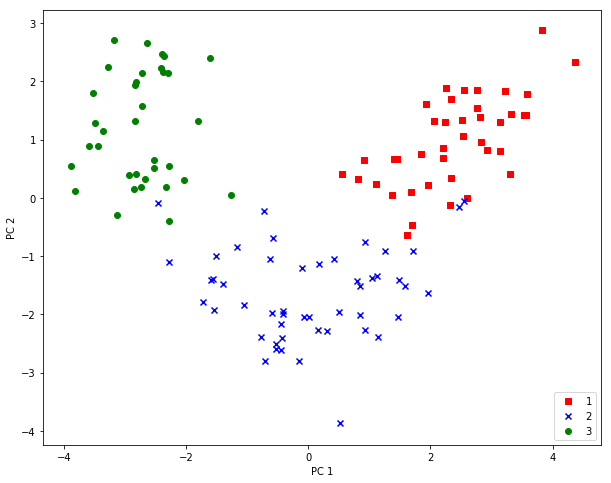

In [12]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(10,8))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

# Regresión Logit

A continuación vamos a montar un ejemplo en el que utilizamos scikit-learn para primero hacer una reducción con PCA y después aplicar una regresión logit sobre las coordenadas en los ejes factoriales. 

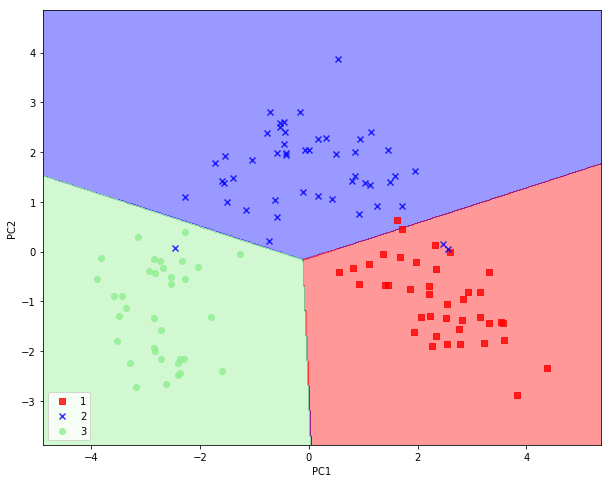

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # definimos generación del marker y el color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Generamos la rejilla
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Dibujamos las clases
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Nos quedamos con dos componentes
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std) #Ajustamos y calculamos nuevas coordenadas
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

Notar que la figura mostrada más arriba es como si fuera una imagen de la que se ha obtenido anteriormente de forma manual. Esto no es debido a ningún error, si no más bien al hecho de que el signo de los valores obtenidos depende del tipo de resolución que se haya usado para calcular los valores y los vectores propios, los cuales pueden cambiar de signo al utilizar uno u otro tipo de resolución. 

# Otro ejemplo

Para afianzar los conceptos expuestos anteriormente sobre este modelo, a continuación se muestra otro ejemplo, en este caso con un conjunto de datos ampliamente utilizado en el mundo de machine learning, me estoy refiriendo a data set denominado iris. 

In [14]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [15]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Nos quedamos sólo con las features
x3 = df.loc[:, features].values
# Ahora elegimos el valor del target
y3 = df.loc[:,['target']].values
# SEstandarizamos las features
x3 = StandardScaler().fit_transform(x3)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# fit_transform ajustamos el modelo y calculamos los nuevos valores en los
# ejes factoriales
principalComponents = pca.fit_transform(x3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Componente Principal 1', 'Componente Principal 2'])

In [17]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

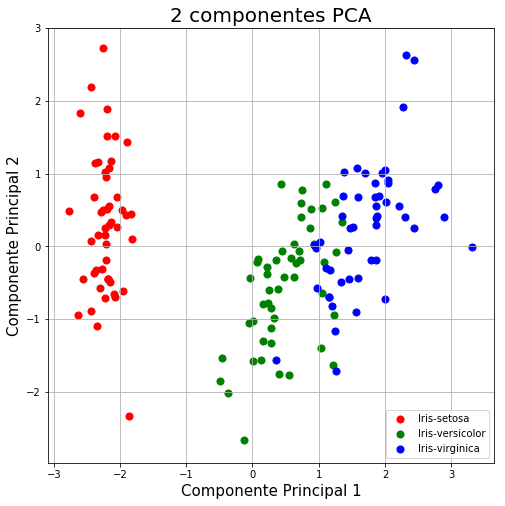

In [18]:
import matplotlib.pylab as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Componente Principal 1']
               , finalDf.loc[indicesToKeep, 'Componente Principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

In [19]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# Análisis discriminante lineal.

El análisis discriminante lineal ( en inglés **Linear Discriminant Analysis**, con siglas LDA), presenta muchas similitudes con el análisis factorial descrito anteriormente, sin embargo presenta ciertas propiedades que son características de este modelo y que a continuación se pasan a exponer.

LDA supone que los datos con los que se trabaja están normalmente distribuidos, así como que las clases tienen igual matriz de covarianzas así como que las features son independientes entre ellas. No obstante si una o más de las condiciones anteriores son ligeramente violadas, el modelo con este sistema puede trabajar razonablemente bien.

Al igual que se ha hecho para el análisis factorial, los pasos a dar para realizar este tipo de análisis, son los siguientes:

1.- Estandarizar por columnas la matriz de los datos.

2.- Para cada clase calcular su media.

3.- Construir la matriz de varianzas entre clases \\( S_B \\), y la matriz de varianzas dentro de las clases \\( S_W \\)

4.- Calcular los valores y vectores propios de la matriz \\( S_W^{-1}S_B \\)

5.- Elegir lo valores propios sociados a los k mayores valores propios para construir la matriz de transformación W, siendo esos valores propios elegidos anteriormente las columnas de esa matriz.

6.- Proyectar las muestra de los datos sobre el nuevo subespacio, utilizando para ello la matriz de transformación W.

Para el ejemplo que sigue se va a utilizar los datos "wine" utilizados anteriormente, que como ya están estandarizados, se puede decir que el punto 1 ya se ha realizado. 



# Construcción manual del modelo

Comenzamos pues por el segundo paso, es decir calculamos la media de cada feaure para cada una de las  clases . 

In [20]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
    #Lo siguiente calcula la media de cada feature por clase
    X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



Con las medias calculadas anteriormente, se podrá calcular la matriz de varianzas dentro de la clases \\(( S_W \\)

\\[ S_W=\sum_{i=1}^c S_i \\]

Donde \\( S_i  \\) es la matriz de varianzas dentro de cada clase.

\\[ S_i=\sum_{x \epsilon D_i}(x-m_i)(x-m_i)^T  \\]



In [21]:
d = X_train_std.shape[1] # número de  features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


Para calcular la matriz de varianzas dentro de las clases, hemos supuesto que el número de elementos dentro de cada clase es el mismo, pero podemos ver que esta suposición no es cierta.

In [22]:
print('Distribución de las clases: %s' % np.bincount(y_train)[1:])

Distribución de las clases: [40 49 35]


Por lo tanto para hacer un cálculo correcto, debemos ponderar por el peso de cada clase.

In [23]:
d = X_train_std.shape[1] # número de  features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


Ahora procedemos a calcular la varianza entre clases \\( S_B \\)

\\[ S_B=\sum_{i=1}^c (m_i-m)(m_i-m)^T \\]

Suemdo m la la media global

In [24]:
#Calculo del vector m
mean_overall = np.mean(X_train_std, axis=0)
mean_overall

array([ 2.8902e-15, -1.2556e-15,  1.1451e-15,  2.5625e-15, -3.2590e-16,
       -1.3511e-15,  2.7756e-16, -1.6394e-15,  1.0816e-15, -3.9395e-17,
       -1.8623e-16,  1.0690e-15,  2.2831e-17])

In [25]:
d = X_train_std.shape[1] # número de  features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Matriz varianza entre clases: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Matriz varianza entre clases: 13x13


Ahora damos el siguiente paso y calculamos los valores y vectores propios de la matriz \\( S_W^{-1}S_B \\)

In [26]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

Elaboramos los pares valor propio-vector propio y ordenamos en orden descendente

In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Valores propios en orden decreciente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Valores propios en orden decreciente:

452.72158124497423
156.43636121952318
1.0758537055464728e-13
4.4387356399897533e-14
2.872660093414232e-14
2.842170943040401e-14
2.40168676571112e-14
1.594530890236398e-14
1.594530890236398e-14
9.937234430308325e-15
9.937234430308325e-15
2.827698412874921e-15
2.827698412874921e-15


Al igual que hemos hecho con el modelo PCA, ahora lo hacemos con LDA colocando en una gráfica los valores propios obtenidos.

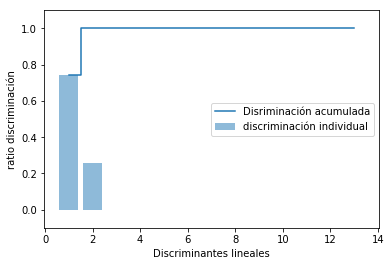

In [28]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
    label='discriminación individual')
plt.step(range(1, 14), cum_discr, where='mid',
    label='Disriminación acumulada')
plt.ylabel('ratio discriminación')
plt.xlabel('Discriminantes lineales')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

Ahora creamos la matriz de transformación W

In [29]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
    eigen_pairs[1][1][:, np.newaxis].real))
print('Matriz W:\n', w)

Matriz W:
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


Ahora no tenemos más que proyectar los puntos \\( X^{'}=XW\\)

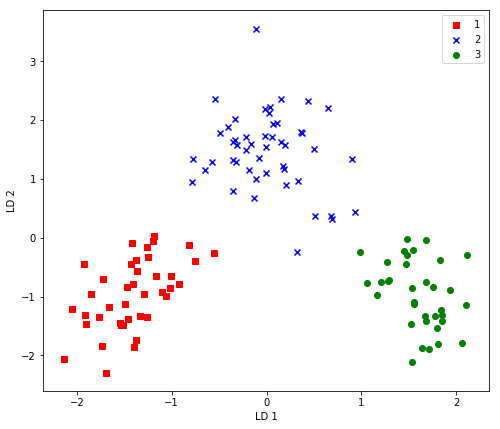

In [30]:
plt.figure(figsize=(8,7))
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
    X_train_lda[y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

La salida que se obtiene con el gráfico está invertida (efecto espejo) respecto de la salida que genera scikit learn. Ello es debido a que los vectores propios que aquí se obtienen tienen un signo contrario al que se obtienen con scikip learn. Para corregirlo, no tenemos más que multiplicarlo por -1 y se tendría la salida igual que la generada con scikip-learn. Veamos a continuación cómo conseguir esto. 

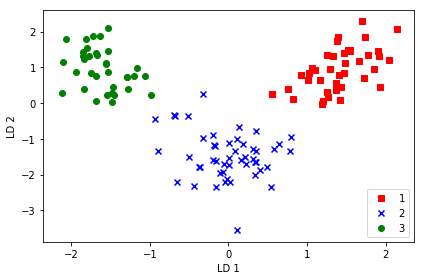

In [31]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

# LDA con scikit-Learn

El ejemplo de antes lo repetimos, pero en esta ocasión utilizando las clases que nos ofrece scikit-learn

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

Ahora hacemos una regresión logit sobre los datos transformados

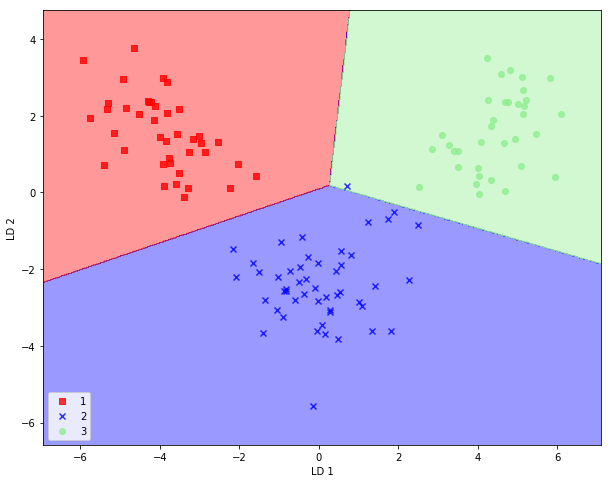

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

Ahoro lo hacemos para el conjunto de datos test

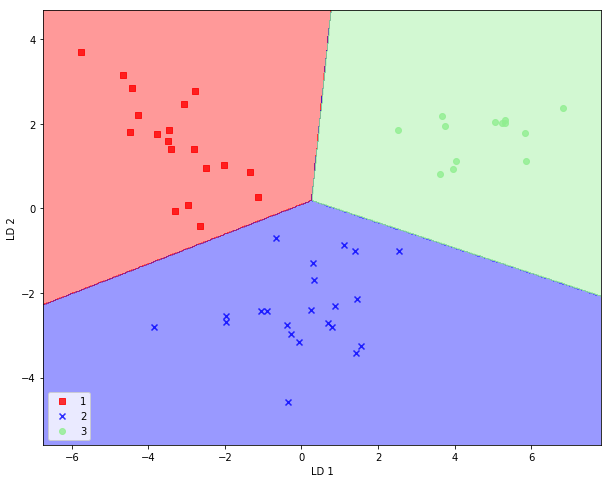

In [34]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

# Lineal y cuadrática Análisis discriminante

Dentro de los modelos de reducción de la dimensionalidad se encuentra también el análisis discriminante cuadrático, que no me voy a extender en él en este post, simplemente indicar que se puede localizar [en este enlace](http://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html){:target="_blank"} , del que se entresaca el siguiente código a efectos ilustrativos. 

Automatically created module for IPython interactive environment


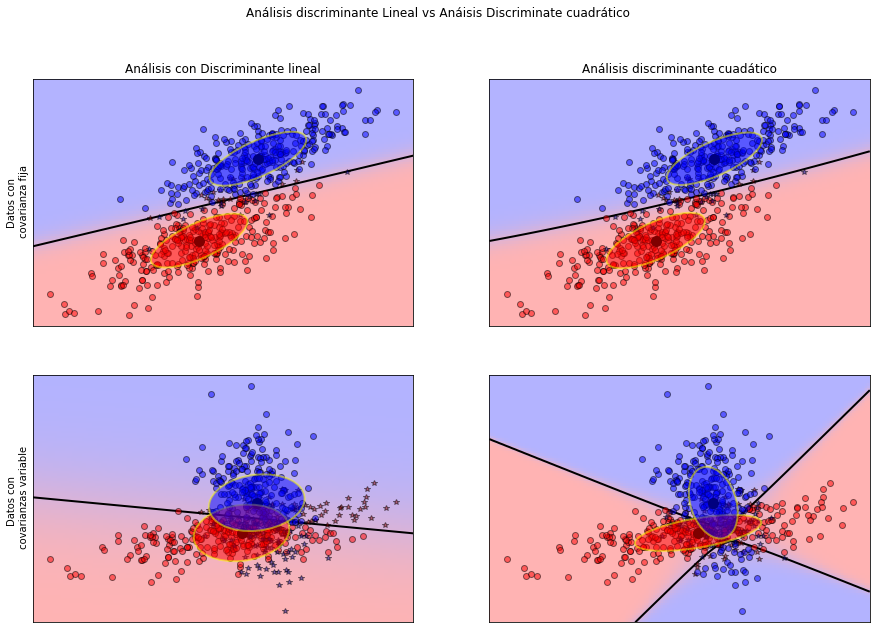

In [35]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
plt.figure(figsize=(15,10))
# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Análisis con Discriminante lineal')
        plt.ylabel('Datos con\n covarianza fija')
    elif fig_index == 2:
        plt.title('Análisis discriminante cuadático')
    elif fig_index == 3:
        plt.ylabel('Datos con \n covarianzas variable')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Análisis discriminante Lineal vs Anáisis Discriminate cuadrático')
plt.show()